# **Preparación del Entorno**
 Utiliza el archivo retail_sales.csv del proyecto II.

In [1]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd

# **Cargar los Datos**
Carga el archivo retail_sales.csv en un DataFrame de Pandas.



In [3]:
# Importamos una bbdd en formato csv y lo guardamos en una variable.
path = "/content/drive/MyDrive/Bootcamp-CSDATOS/CORES/Proyecto I _Parte III (Core)/retail_sales_dataset.csv"  #cambiar x url de la data
df = pd.read_csv(path)
df2=df.copy() #Se crea copia para no correr riesgo de modificar el original

In [4]:
#validamos que se cargó bien e información de la data
df2.shape

(1000, 9)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df2.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df2.head()
print(df2.tail())

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  


# **Transformación de Datos**
1. Crea nuevas columnas: Basándonos en los datos existentes, crea nuevas columnas que sean útiles para el análisis. Por ejemplo, calcula el ingreso total por venta y normaliza las ventas.
2. Clasifica los datos: Crea una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [8]:
# Para crear nuevas columnas con informacion valiosa.
# 1) Obtener la media del monto de las ventas
prom_amount = df2['Total Amount'].mean()
print(prom_amount)
# Calcular la diferencua entre la media y el Total Amount, para crear la nueva columna y tener la relación de la venta respecto del precio medio
df2["Dif_prom"] = df2["Total Amount"] - prom_amount
df2.head(10)

456.0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Dif_prom
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-306.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,544.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-426.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,44.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-356.0
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,-426.0
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,-406.0
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,-356.0
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,144.0
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,-256.0


In [9]:
# 2.- Clasificar datos, Rango etario
# Registros con un Total Amount superior  800 --> "Categoria Ventas : Alta"
def clasificar_edad(edad: int) -> str:
  '''
  Clasificar por edad.
  '''
  if edad < 40 :
      return "Joven"
  elif edad <= 40:
      return "Adulto Joven"
  elif edad <=50:
      return "Adulto"
  else:
      return "Adulto Mayor"

df2["Claseedad"] = df2["Age"].apply(clasificar_edad)
df2.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Dif_prom,Claseedad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-306.0,Joven
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,544.0,Joven
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-426.0,Adulto
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,44.0,Joven
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-356.0,Joven
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,-426.0,Adulto
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,-406.0,Adulto
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,-356.0,Joven
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,144.0,Adulto Mayor
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,-256.0,Adulto Mayor


# **Agrupación y Agregación**
1. Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
2. Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [10]:
# 1. Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.
# Agrupando por 'Gender' y Product Category y saber cuánto dinero invierten en ello
#Cuánto gastan hombres y mujeres en las categorias? En esteno hay grandes diferencias en los montos
df2.groupby(["Gender", "Product Category"])["Total Amount"].sum()

Gender  Product Category
Female  Beauty              74830
        Clothing            81275
        Electronics         76735
Male    Beauty              68685
        Clothing            74305
        Electronics         80170
Name: Total Amount, dtype: int64

In [11]:
# 2.- Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.
df2.groupby(["Product Category", "Gender"])["Total Amount"].agg(["sum", "mean", "std","min", "max","count"]).round(2)
#Mujes invierten mas en productos de belleza y ropa que los hombres
#hombres invierten mas en productos electrónicos que las mujeres

sum    mean     std  min   max  count
Product Category Gender                                         
Beauty           Female  74830  450.78  538.74   25  2000    166
                 Male    68685  487.13  592.90   25  2000    141
Clothing         Female  81275  467.10  577.02   25  2000    174
                 Male    74305  419.80  524.12   25  2000    177
Electronics      Female  76735  451.38  548.64   25  2000    170
                 Male    80170  466.10  587.13   25  2000    172

# **Análisis Personalizado con apply**
1. Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.
2. Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo.

In [12]:
# 1 Apply.- Clasificar Ventas según rangos
# Registros con un Total Amount inferior a  300 --> "Categoria Ventas : Baja"
# Registros con un Total Amount inferior o igual a  800 --> "Categoria Ventas : Media"
# Registros con un Total Amount superior  800 --> "Categoria Ventas : Alta"
def clasificar_edad(tot: int) -> str:
  '''
  Clasificar Total_Amount.
  '''
  if tot < 300:
      return "Baja"
  elif tot <= 800:
      return "Media"
  else:
      return "Alta"

df2["Cat Ventas"] = df2["Total Amount"].apply(clasificar_edad)
df2.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Dif_prom,Claseedad,Cat Ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-306.0,Joven,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,544.0,Joven,Alta
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-426.0,Adulto,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,44.0,Joven,Media
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-356.0,Joven,Baja
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,-426.0,Adulto,Baja
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,-406.0,Adulto,Baja
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,-356.0,Joven,Baja
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,144.0,Adulto Mayor,Media
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,-256.0,Adulto Mayor,Baja


In [13]:
# 2.- Ejemplo de uso avanzado: Calcula la desviación de cada venta respecto a la media de su grupo
#Obtengo la mediana
media_amount = df2['Total Amount'].mean()
print(media_amount)


df2["desviacion_venta"] = df2['Total Amount'].apply(lambda x: x-media_amount)
df2.head(10)


456.0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Dif_prom,Claseedad,Cat Ventas,desviacion_venta
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,-306.0,Joven,Baja,-306.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,544.0,Joven,Alta,544.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,-426.0,Adulto,Baja,-426.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,44.0,Joven,Media,44.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,-356.0,Joven,Baja,-356.0
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,-426.0,Adulto,Baja,-426.0
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,-406.0,Adulto,Baja,-406.0
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,-356.0,Joven,Baja,-356.0
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,144.0,Adulto Mayor,Media,144.0
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,-256.0,Adulto Mayor,Baja,-256.0


# **Documentación**
1. Comentarios claros: Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
2. Código legible: Asegúrate de que el código sea legible y esté bien comentado.

# **Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización**

**Continuar desde la Parte III**
Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

# **Análisis Descriptivo y Visualización**






**1. Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.**

In [16]:
# Análisis general
df2.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Dif_prom,desviacion_venta
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,0.000000,0.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632,559.997632,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000,-431.000000,-431.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,-396.000000,-396.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,-321.000000,-321.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,444.000000,444.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,1544.000000,1544.000000


In [17]:
#  Buena Práctica : normalizo los nombres de columnas
df2.columns = df2.columns.str.lower().str.replace(" ", "_")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1000 non-null   int64  
 1   date              1000 non-null   object 
 2   customer_id       1000 non-null   object 
 3   gender            1000 non-null   object 
 4   age               1000 non-null   int64  
 5   product_category  1000 non-null   object 
 6   quantity          1000 non-null   int64  
 7   price_per_unit    1000 non-null   int64  
 8   total_amount      1000 non-null   int64  
 9   dif_prom          1000 non-null   float64
 10  claseedad         1000 non-null   object 
 11  cat_ventas        1000 non-null   object 
 12  desviacion_venta  1000 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


**2. Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.**
Columnas age, quantity, price_per_unit y total_amount


In [28]:
import matplotlib.pyplot as plt

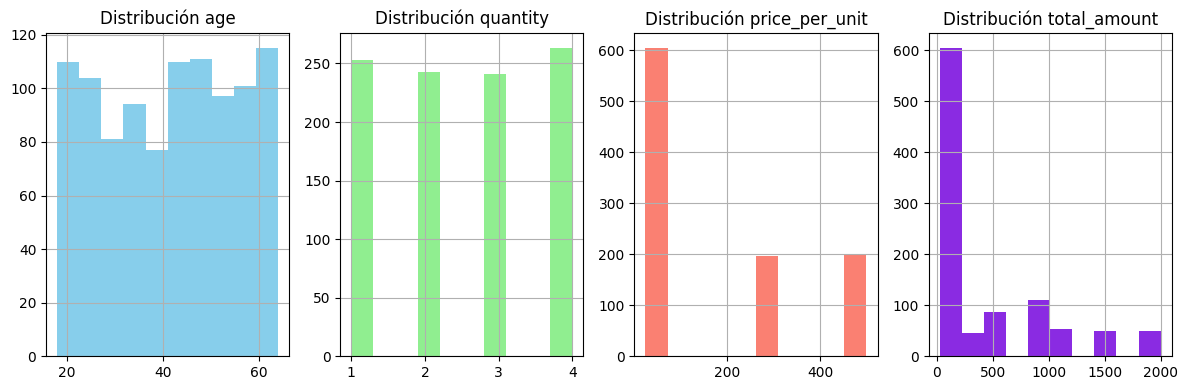

In [29]:
#Análisis con histogramas

# Columnas numéricas
data1 = df2['age']
data2 = df2['quantity']
data3 = df2['price_per_unit']
data4 = df2['total_amount']

plt.figure(figsize=(12, 4))


# Primer gráfico
plt.subplot(1, 4, 1)
plt.grid(True)
plt.hist(data1, bins=10, color='skyblue')
plt.title('Distribución age')

# Segundo gráfico
plt.subplot(1, 4, 2)  # Gráfico 2.
plt.grid(True)
plt.hist(data2, bins=10, color='lightgreen')
plt.title('Distribución quantity')

# Tercer gráfico
plt.subplot(1, 4, 3)  # Gráfico 3.
plt.grid(True)
plt.hist(data3, bins=10, color='salmon')
plt.title('Distribución price_per_unit')


# Cuarto gráfico
plt.subplot(1, 4, 4)  # Gráfico 4.
plt.grid(True)
plt.hist(data4, bins=10, color='blueviolet')
plt.title('Distribución total_amount')

plt.tight_layout()
plt.show()

<ipython-input-35-573932877>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=['age', 'quantity', 'price_per_unit', 'total_amount'])


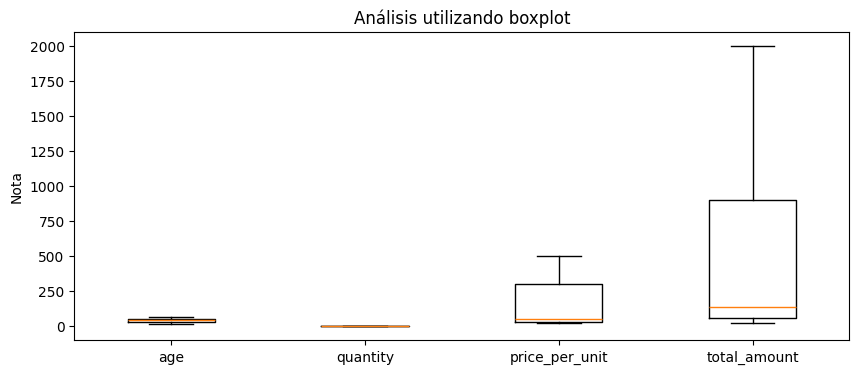

In [35]:
# Análisis con boxplot
# Al igual que en el resto de graficos, podemos analizar varias variables en un solo grafico.

plt.figure(figsize=(10, 4))

# Columnas numéricas
data1 = df2['age']
data2 = df2['quantity']
data3 = df2['price_per_unit']
data4 = df2['total_amount']

# Juntamos los datos en una lista.
datos = [data1, data2, data3, data4]

# Creamos el boxplot.
plt.boxplot(datos, labels=['age', 'quantity', 'price_per_unit', 'total_amount'])

# Añadimos título y etiquetas.
plt.title('Análisis utilizando boxplot')
plt.ylabel('Nota')

plt.show()

In [51]:


# Columnas numéricas
data1 = df2['age']
data2 = df2['quantity']
data3 = df2['price_per_unit']
data4 = df2['total_amount']

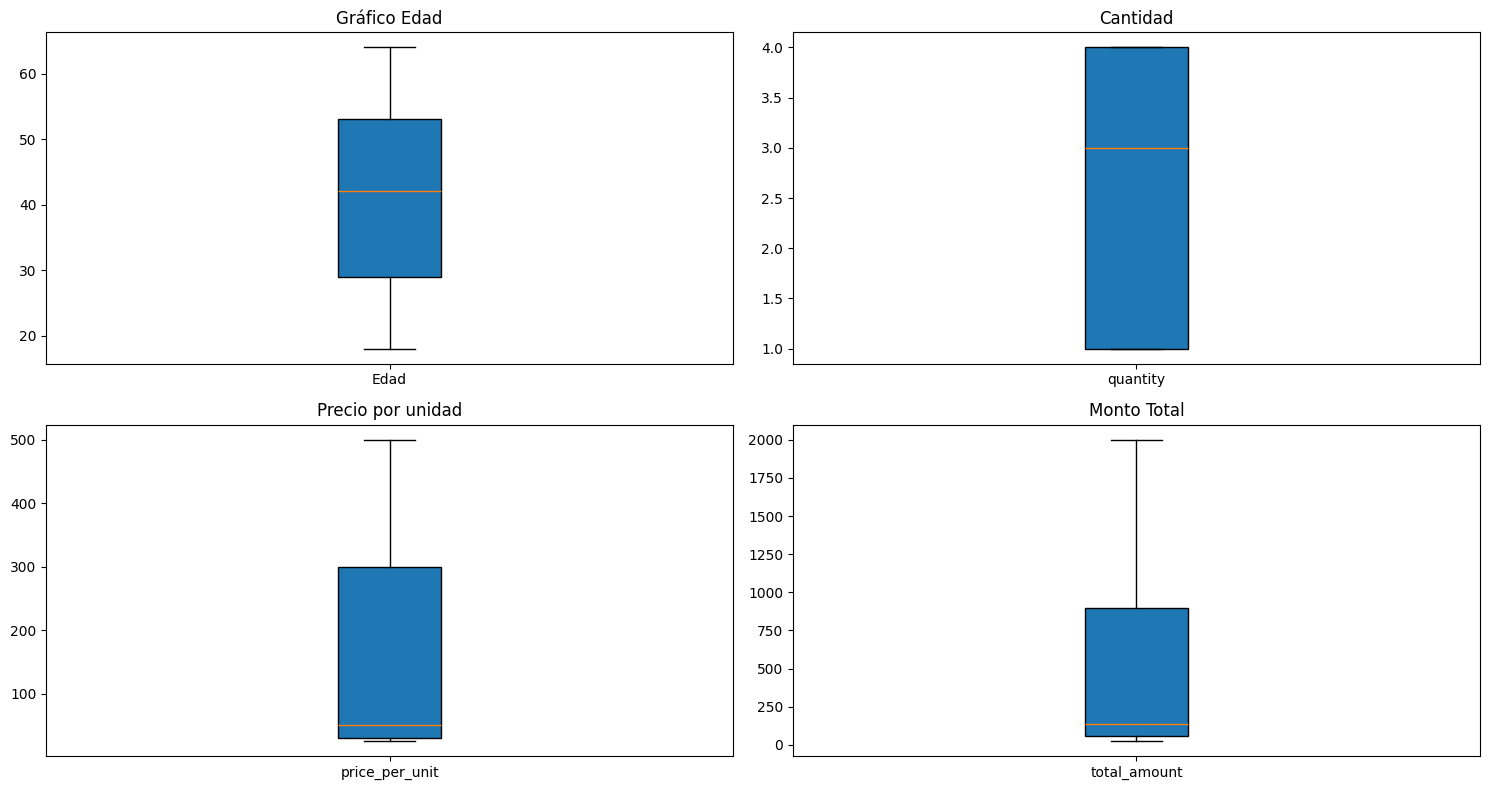

In [55]:

# Crear la figura y los subplots.
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
# es de 2 x 3 --> 2 filas 3 columnas

# Boxplot 'age'.
axs[0, 0].boxplot(data1, patch_artist=True)
axs[0, 0].set_title('Gráfico Edad')
axs[0, 0].set_xticklabels(['Edad'])


# Boxplot.
axs[0, 1].boxplot(data2, patch_artist=True)
axs[0, 1].set_title('Cantidad')
axs[0, 1].set_xticklabels(['quantity'])

# Boxplot.
axs[1, 0].boxplot(data3, patch_artist=True)
axs[1, 0].set_title('Precio por unidad')
axs[1, 0].set_xticklabels(['price_per_unit'])

# Boxplot.
axs[1, 1].boxplot(data4, patch_artist=True)
axs[1, 1].set_title('Monto Total')
axs[1, 1].set_xticklabels(['total_amount'])


# Ajustar el espacio entre gráficos.
plt.tight_layout()
plt.show()

**3. Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.**

In [57]:
#modifico formato a columna date
df2['date'] = pd.to_datetime(df2['date'])

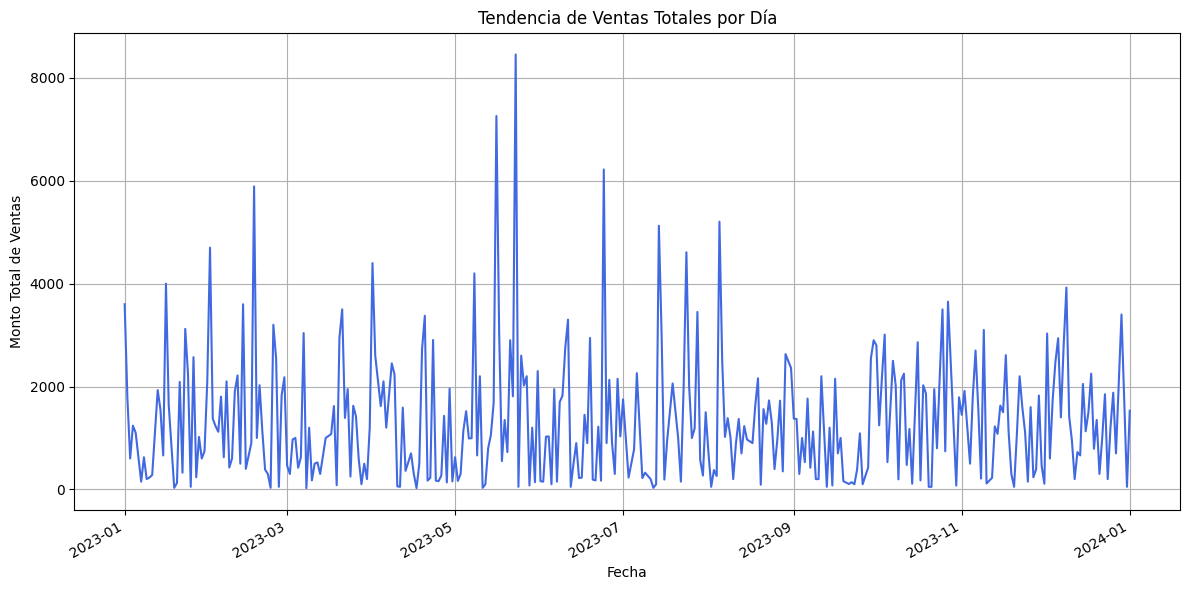

In [59]:
ventas_diarias = df2.groupby('date')['total_amount'].sum()

ventas_diarias.plot(figsize=(12,6), color='royalblue')
plt.title('Tendencia de Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.**
* ¿Los clientes de más edad gastan más?

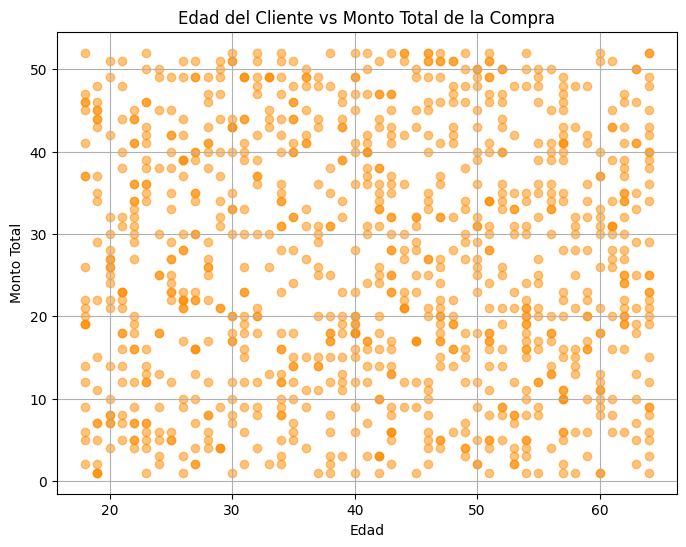

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['age'], df2['total_amount'], alpha=0.5, color='darkorange')
plt.title('Edad del Cliente vs Monto Total de la Compra')
plt.xlabel('Edad')
plt.ylabel('Monto Total')
plt.grid(True)
plt.show()

Observación: No hay una tendencia clara que indique que a mayor o menor edad el monto total de compra sea más alto o más bajo.

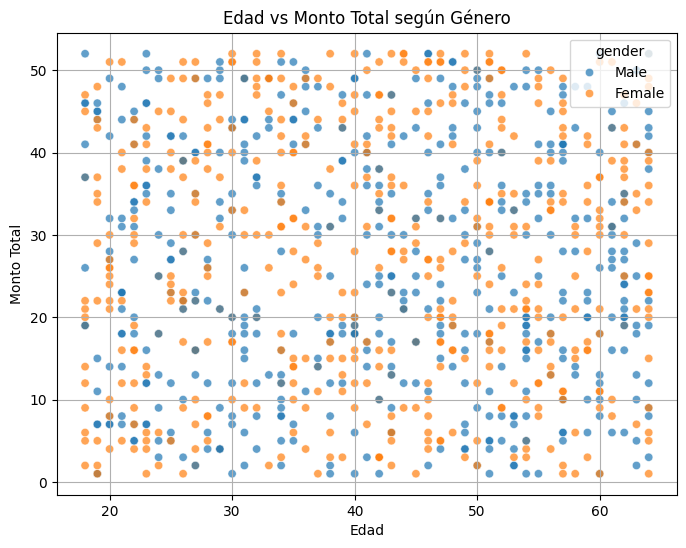

In [72]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='age', y='total_amount', hue='gender', alpha=0.7)
plt.title('Edad vs Monto Total según Género')
plt.xlabel('Edad')
plt.ylabel('Monto Total')
plt.grid(True)
plt.show()

obs: Los puntos azules (hombres) y naranjos (mujeres) están distribuidos de forma bastante homogénea en todas las edades y rangos de monto.

No se observa un grupo que gaste sistemáticamente más que el otro.

**5. Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.**

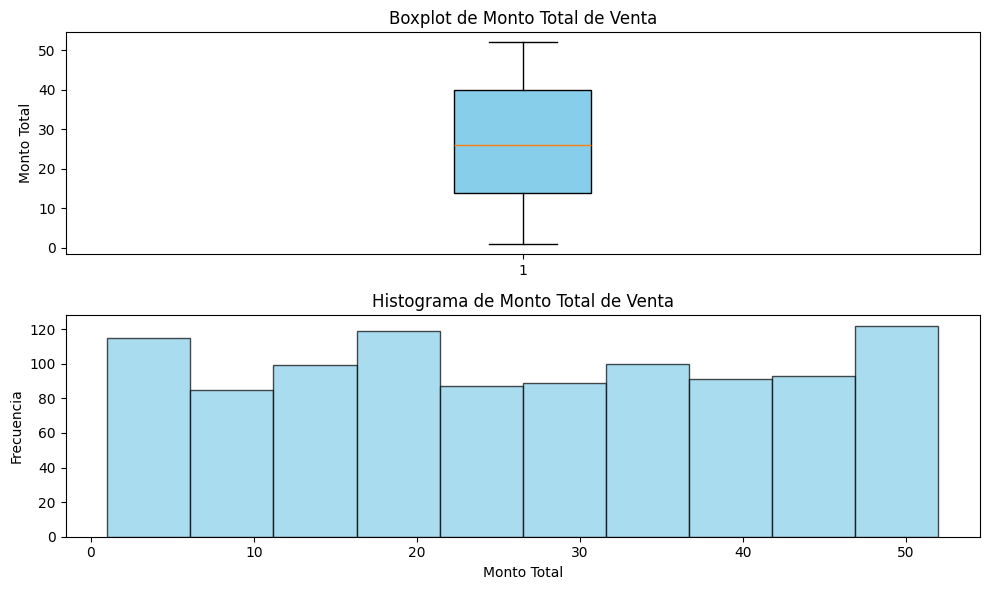

In [74]:
import matplotlib.pyplot as plt

data = df2['total_amount']

# Crear figura con 2 subplots: boxplot arriba y histograma abajo
plt.figure(figsize=(10, 6))

# Boxplot
plt.subplot(2, 1, 1)
plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot de Monto Total de Venta')
plt.ylabel('Monto Total')

# Histograma
plt.subplot(2, 1, 2)
plt.hist(data, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Monto Total de Venta')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Obs: No vay valores atipicos, la concentración del total de la venta está entre los 15 y 40.


**Generar un Pull Request en GitHub**
Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.